### Dataset description
The Iris dataset was first used in Ronald Aylmer Fisher's classic article 1936 ([The Use of Multiple Measurements in Taxonomic Problems](https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1469-1809.1936.tb02137.x))

It includes three species of iris with 50 samples of each type as well as some properties of each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:
1. Id
2. SepalLengthCm
3. SepalWidthCm 
4. PetalLengthCm 
5. PetalWidthCm 
6. Species (les classes)

![Texte alternatif…](https://raw.githubusercontent.com/saidRaiss/dataset/master/iris_flower.jpg)


### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Dataset

In [2]:
# Loading data
data = pd.read_csv(
"https://raw.githubusercontent.com/saidRaiss/dataset/master/Iris_datasets.csv"
)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
106,107,4.9,2.5,4.5,1.7,Iris-virginica
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
133,134,6.3,2.8,5.1,1.5,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica


According to the two commands data.info () and data.sample (5): the dataset contains 150 samples (very small which is not good for machine learning) and 6 columns. The Id column is unnecessary.

In [5]:
# Drop Id column
data.drop(['Id'], axis=1, inplace=True)

In [6]:
# Iris types
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

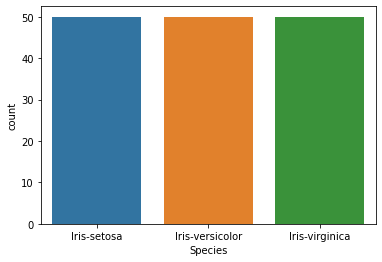

In [7]:
# The dataset is balanced
classes = data['Species']
ax = sns.countplot(x=classes, data=data)

![Texte alternatif…](https://raw.githubusercontent.com/saidRaiss/dataset/master/iris_types.jpeg)

### Exploratory data analysis

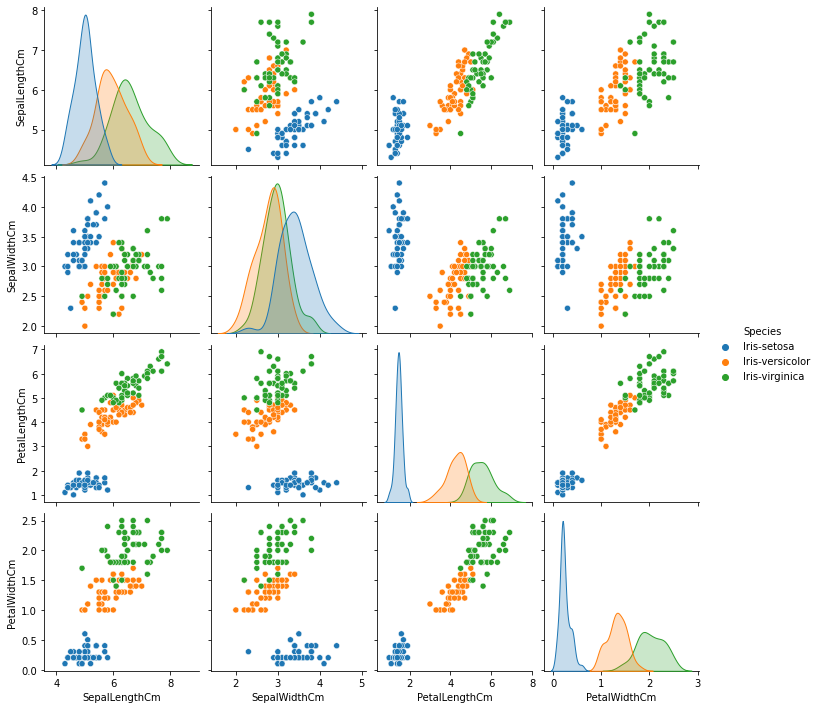

In [8]:
sns.pairplot(data, hue='Species')

According to this magnificent result thanks to the Seaborn library, PetalLength and PetalWidth give a better division of the classes compared to SepalLength and SepalWidth (in particular the SepalWidth variable see the second figure on the diagonal). This is an indication that the petals can help with better and accurate predictions than the sepals. Likewise, we observe that the Iris-setosa class is linearly separable from the other two classes, which is not the case for Iris-versicolor and Iris-verginica. Therefore, if the test dataset contains a larger number of the Iris-setosa class than the other two, the model gives high precision! We must therefore be careful.

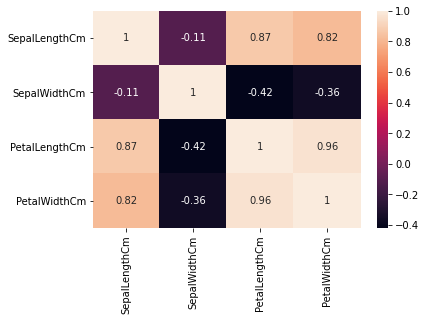

In [9]:
# Correlation between variables
corr = data.corr()
sns.heatmap(corr, annot= True);

SepalWidthCm has no correlation with the other variables. In addition, PetalLengthCm and PetalWidthCm are strongly correlated and have a strong correlation with SepalLengthCm. So ignoring the width of the sepals can improve the accuracy of the model.

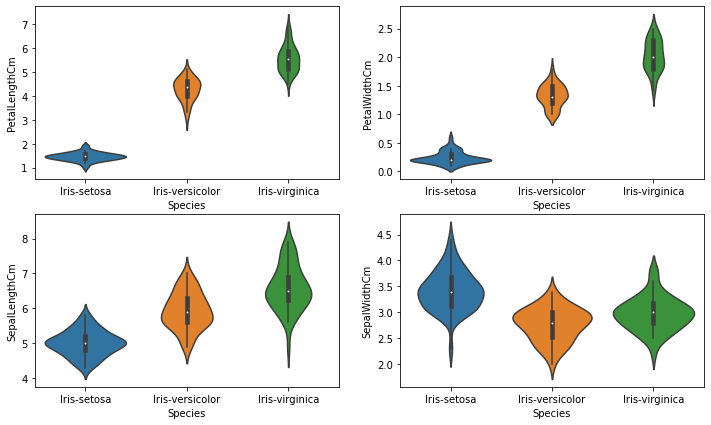

In [10]:
# How length and width vary by species?
plt.figure(figsize=(12,7))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

The **violinplot** shows the density of length and width in the species. The thinner part indicates there is less density while the thicker part indicates higher density.

### Dataset splitting Train/Test

In [11]:
X = data.drop(['Species'], axis=1)
y = data['Species'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=22
    )

In [12]:
classes_test = pd.DataFrame(y_test.reshape(-1, 1))
classes_test[0].value_counts()

Iris-virginica     14
Iris-versicolor    13
Iris-setosa        11
Name: 0, dtype: int64

Okay, the dataset is almost balanced with less of the Iris-setosa species.

### Logistic regression

In [13]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train.ravel())
log_reg_pred = log_reg.predict(X_test)

In [14]:
metrics.accuracy_score(log_reg_pred, y_test)

0.9473684210526315

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, log_reg_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 12]])

The logistic regression model has good precision and its confusion matrix shows that the confusion occurs at the level of Iris-versicolor and Iris-virginica.

### Linear discriminant analysis

In [16]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train.ravel())
lda_pred = lda.predict(X_test)

In [17]:
metrics.accuracy_score(lda_pred, y_test)

1.0

In [18]:
confusion_matrix = metrics.confusion_matrix(y_test, lda_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 14]])

Excellent!

### Quadratic discriminant analysis

In [19]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train.ravel())
qda_pred = qda.predict(X_test)

In [20]:
metrics.accuracy_score(lda_pred, y_test)

1.0

In [21]:
confusion_matrix = metrics.confusion_matrix(y_test, qda_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 14]])

Excellent!

### Support vector machine SVM

In [22]:
svc = svm.SVC()
svc.fit(X_train, y_train.ravel())
svc_pred = svc.predict(X_test)

In [23]:
metrics.accuracy_score(svc_pred, y_test)

0.9473684210526315

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, svc_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 12]])

The same result of logistic regression

### K-nearest neighbors method

([<matplotlib.axis.XTick at 0x7fd95263f668>,
 <a list of 14 Text major ticklabel objects>)

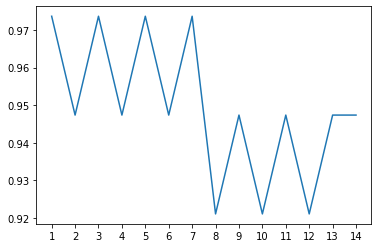

In [25]:
# Choose k
a_index=list(range(1,15))
a=pd.Series(dtype='float64')
x=[1,2,3,4,5,6,7,8,9,10, 11, 12, 13, 14]
for i in list(range(1,15)):
    KNNmodel=KNeighborsClassifier(n_neighbors=i) 
    KNNmodel.fit(X_train,y_train.ravel())
    KNNprediction=KNNmodel.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(KNNprediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [26]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train.ravel())
knn_pred = knn.predict(X_test)

In [27]:
metrics.accuracy_score(knn_pred, y_test)

0.9736842105263158

In [28]:
confusion_matrix = metrics.confusion_matrix(y_test, svc_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 12]])

Better than logistic regression

### Decision tree


In [29]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train.ravel())
dtc_pred = dtc.predict(X_test)

In [30]:
metrics.accuracy_score(dtc_pred, y_test)

0.9210526315789473

In [31]:
confusion_matrix = metrics.confusion_matrix(y_test, dtc_pred)
confusion_matrix

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 11]])

So the decision tree is not the right solution.

### Conclusion
The best model for this problem is **Linear or Qudratic Discriminant Analysis**.